In [203]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.ticker import MaxNLocator
import matplotlib.dates as dates
from math import sqrt
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler ,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [204]:
df = pd.read_csv("NIFTY 50_Historical_PR_02071990to14072024.csv")
df

,Index Name,Date,Open,High,Low,Close
0,NIFTY 50,12 Jul 2024,24387.95,24592.2,24331.15,24502.15
1,NIFTY 50,11 Jul 2024,24396.55,24402.65,24193.75,24315.95
2,NIFTY 50,10 Jul 2024,24459.85,24461.05,24141.8,24324.45
3,NIFTY 50,09 Jul 2024,24351,24443.6,24331.9,24433.20
4,NIFTY 50,08 Jul 2024,24329.45,24344.6,24240.55,24320.55
...,...,...,...,...,...,...
8258,NIFTY 50,10 Jul 1990,-,-,-,288.69
8259,NIFTY 50,09 Jul 1990,-,-,-,289.69
8260,NIFTY 50,06 Jul 1990,-,-,-,289.04
8261,NIFTY 50,05 Jul 1990,-,-,-,284.04


In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8263 entries, 0 to 8262
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Index Name  8263 non-null   object 
 1   Date        8263 non-null   object 
 2   Open        8263 non-null   object 
 3   High        8263 non-null   object 
 4   Low         8263 non-null   object 
 5   Close       8263 non-null   float64
dtypes: float64(1), object(5)
memory usage: 387.5+ KB


In [206]:
df = df[::-1]
df = df[2500:]
df

,Index Name,Date,Open,High,Low,Close
5762,NIFTY 50,10 May 2001,1149.10,1151.60,1139.25,1144.95
5761,NIFTY 50,11 May 2001,1144.10,1146.85,1136.90,1140.50
5760,NIFTY 50,14 May 2001,1140.45,1146.25,1134.05,1140.80
5759,NIFTY 50,15 May 2001,1140.75,1147.75,1096.25,1145.30
5758,NIFTY 50,16 May 2001,1147.10,1163.15,1146.05,1151.15
...,...,...,...,...,...,...
4,NIFTY 50,08 Jul 2024,24329.45,24344.6,24240.55,24320.55
3,NIFTY 50,09 Jul 2024,24351,24443.6,24331.9,24433.20
2,NIFTY 50,10 Jul 2024,24459.85,24461.05,24141.8,24324.45
1,NIFTY 50,11 Jul 2024,24396.55,24402.65,24193.75,24315.95


In [207]:
df =df.reset_index()

In [208]:
df

,index,Index Name,Date,Open,High,Low,Close
0,5762,NIFTY 50,10 May 2001,1149.10,1151.60,1139.25,1144.95
1,5761,NIFTY 50,11 May 2001,1144.10,1146.85,1136.90,1140.50
2,5760,NIFTY 50,14 May 2001,1140.45,1146.25,1134.05,1140.80
3,5759,NIFTY 50,15 May 2001,1140.75,1147.75,1096.25,1145.30
4,5758,NIFTY 50,16 May 2001,1147.10,1163.15,1146.05,1151.15
...,...,...,...,...,...,...,...
5758,4,NIFTY 50,08 Jul 2024,24329.45,24344.6,24240.55,24320.55
5759,3,NIFTY 50,09 Jul 2024,24351,24443.6,24331.9,24433.20
5760,2,NIFTY 50,10 Jul 2024,24459.85,24461.05,24141.8,24324.45
5761,1,NIFTY 50,11 Jul 2024,24396.55,24402.65,24193.75,24315.95


In [209]:
df = df.set_index('Date')
col = ['index','Index Name']
df = df.drop(col,axis=1)
df, df.shape

(                 Open      High       Low     Close
 Date                                               
 10 May 2001   1149.10   1151.60   1139.25   1144.95
 11 May 2001   1144.10   1146.85   1136.90   1140.50
 14 May 2001   1140.45   1146.25   1134.05   1140.80
 15 May 2001   1140.75   1147.75   1096.25   1145.30
 16 May 2001   1147.10   1163.15   1146.05   1151.15
 ...               ...       ...       ...       ...
 08 Jul 2024  24329.45   24344.6  24240.55  24320.55
 09 Jul 2024     24351   24443.6   24331.9  24433.20
 10 Jul 2024  24459.85  24461.05   24141.8  24324.45
 11 Jul 2024  24396.55  24402.65  24193.75  24315.95
 12 Jul 2024  24387.95   24592.2  24331.15  24502.15
 
 [5763 rows x 4 columns],
 (5763, 4))

In [210]:
df.isnull().sum()

Open     0
High     0
Low      0
Close    0
dtype: int64

In [211]:
print(df.dtypes)

Open      object
High      object
Low       object
Close    float64
dtype: object


In [212]:
df['Open'] = pd.to_numeric(df['Open'])
df['High'] = pd.to_numeric(df['High'])
df['Low'] = pd.to_numeric(df['Low'])


In [213]:
df,df.shape

(                 Open      High       Low     Close
 Date                                               
 10 May 2001   1149.10   1151.60   1139.25   1144.95
 11 May 2001   1144.10   1146.85   1136.90   1140.50
 14 May 2001   1140.45   1146.25   1134.05   1140.80
 15 May 2001   1140.75   1147.75   1096.25   1145.30
 16 May 2001   1147.10   1163.15   1146.05   1151.15
 ...               ...       ...       ...       ...
 08 Jul 2024  24329.45  24344.60  24240.55  24320.55
 09 Jul 2024  24351.00  24443.60  24331.90  24433.20
 10 Jul 2024  24459.85  24461.05  24141.80  24324.45
 11 Jul 2024  24396.55  24402.65  24193.75  24315.95
 12 Jul 2024  24387.95  24592.20  24331.15  24502.15
 
 [5763 rows x 4 columns],
 (5763, 4))

In [214]:
df.dtypes

Open     float64
High     float64
Low      float64
Close    float64
dtype: object

<Axes: >

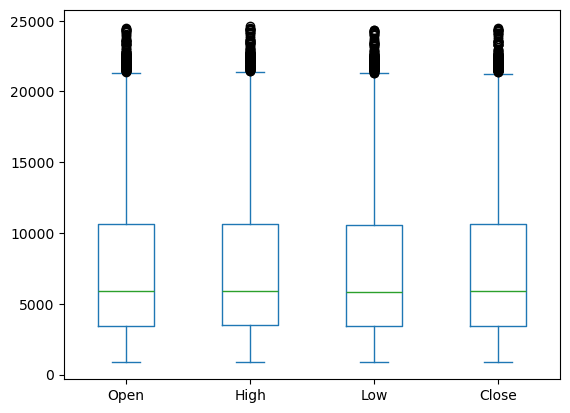

In [215]:
df[['Open','High','Low','Close']].plot(kind='box')

In [216]:
x = df[['Open','High','Low']]
y = df[['Close']]
x,y,x.shape,y.shape

(                 Open      High       Low
 Date                                     
 10 May 2001   1149.10   1151.60   1139.25
 11 May 2001   1144.10   1146.85   1136.90
 14 May 2001   1140.45   1146.25   1134.05
 15 May 2001   1140.75   1147.75   1096.25
 16 May 2001   1147.10   1163.15   1146.05
 ...               ...       ...       ...
 08 Jul 2024  24329.45  24344.60  24240.55
 09 Jul 2024  24351.00  24443.60  24331.90
 10 Jul 2024  24459.85  24461.05  24141.80
 11 Jul 2024  24396.55  24402.65  24193.75
 12 Jul 2024  24387.95  24592.20  24331.15
 
 [5763 rows x 3 columns],
                 Close
 Date                 
 10 May 2001   1144.95
 11 May 2001   1140.50
 14 May 2001   1140.80
 15 May 2001   1145.30
 16 May 2001   1151.15
 ...               ...
 08 Jul 2024  24320.55
 09 Jul 2024  24433.20
 10 Jul 2024  24324.45
 11 Jul 2024  24315.95
 12 Jul 2024  24502.15
 
 [5763 rows x 1 columns],
 (5763, 3),
 (5763, 1))

In [217]:
y

,Close
Date,
10 May 2001,1144.95
11 May 2001,1140.50
14 May 2001,1140.80
15 May 2001,1145.30
16 May 2001,1151.15
...,...
08 Jul 2024,24320.55
09 Jul 2024,24433.20
10 Jul 2024,24324.45


total_days = int(len(df))
train_index = int(total_days * 0.7) # 70% Training Data 30% Testing Data
test_index = train_index
print(train_index)

In [219]:
scaler = MinMaxScaler()
x = scaler.fit_transform(x)
print(x)

[[0.01254297 0.01157907 0.0123201 ]
 [0.01233117 0.01137878 0.01222002]
 [0.01217655 0.01135348 0.01209865]
 ...
 [1.         0.99446979 0.99190442]
 [0.99731857 0.99200724 0.99411676]
 [0.99695427 1.         0.99996806]]


In [220]:
total_days = int(len(df))
train_index = int(total_days * 0.8)
test_index = train_index

total_days = int(len(df))
train_index = int(total_days * 0.8)
test_index = train_index

X_train = x[:train_index]
Y_train = y[:train_index]
X_test = x[test_index:]
Y_test = y[test_index:]

In [223]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.20, random_state=0)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(4610, 3) (1153, 3) (4610, 1) (1153, 1)


In [224]:
print(Y_train)

                Close
Date                 
27 Aug 2015   7948.95
25 May 2004   1606.70
17 Dec 2020  13740.70
11 Dec 2013   6307.90
03 Apr 2013   5672.90
...               ...
04 Mar 2021  15080.75
06 Jun 2014   7583.40
06 Dec 2007   5954.70
18 Oct 2011   5037.50
19 Apr 2012   5332.40

[4610 rows x 1 columns]


In [274]:
model = SVR(C=1.0, epsilon=0.2)
model.fit(X_train,Y_train)

SVR(epsilon=0.2)

In [276]:
model.score(X_train,Y_train)

0.2111241884280035

In [278]:
#predict = model.predict(X_test)
predict = model.predict(df[['Open','High','Low']][test_index:])
print(predict)

[6534.57045417 6534.57045417 6534.57045417 ... 6534.57045417 6534.57045417
 6534.57045417]


In [281]:
mse = mean_squared_error(predict,Y_test)
print("Mean Squared Error ",mse)

Mean Squared Error  30415482.818911046


In [283]:
mae = mean_absolute_error(predict,Y_test)
print("Mean Absolute Error",mae)

Mean Absolute Error 4235.412861662183


In [285]:
rmse = sqrt(mae)
print("Root Mean Squared Error",rmse)

Root Mean Squared Error 65.08004964397448


In [287]:
Y_test = Y_test.sort_values('Date')

In [289]:
Y_test

,Close
Date,
01 Apr 2011,5826.05
01 Apr 2019,11669.15
01 Aug 2003,1195.75
01 Aug 2007,4345.85
01 Aug 2008,4413.55
...,...
31 May 2022,16584.55
31 Oct 2006,3744.10
31 Oct 2008,2885.60


In [291]:
final = pd.DataFrame()
final['Date'] = Y_test.index
final = final.set_index('Date')
final['Close'] = Y_test['Close']
final['Pred'] = predict
final = final.sort_values('Date')

In [293]:
final = final.sort_values('Date')
final

,Close,Pred
Date,,
01 Apr 2011,5826.05,6534.570454
01 Apr 2019,11669.15,6534.570454
01 Aug 2003,1195.75,6534.570454
01 Aug 2007,4345.85,6534.570454
01 Aug 2008,4413.55,6534.570454
...,...,...
31 May 2022,16584.55,6534.570454
31 Oct 2006,3744.10,6534.570454
31 Oct 2008,2885.60,6534.570454


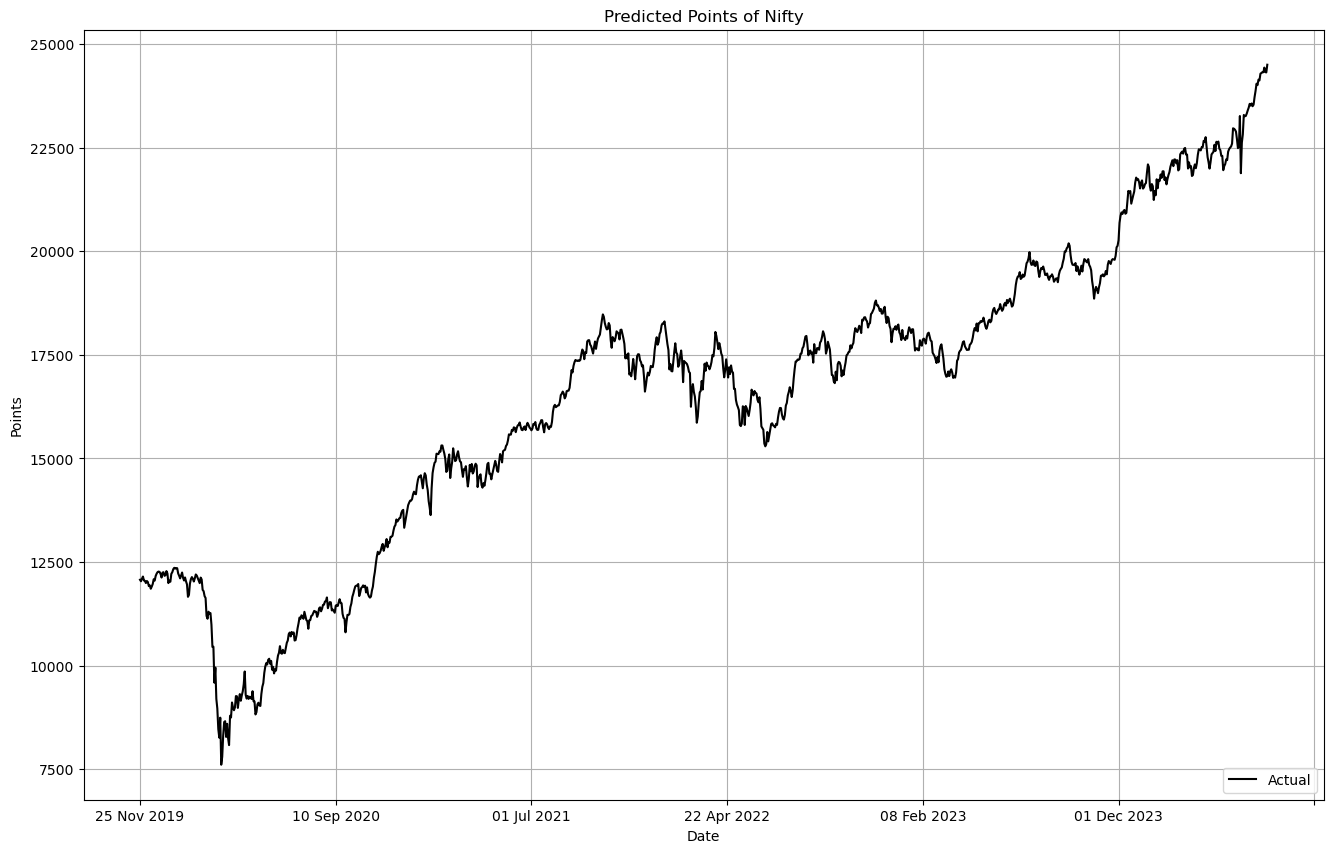

In [295]:
df['Close'][test_index:].plot(figsize=(16,10),color='black')
#final['Pred'].plot(figsize=(16,10),color='red')
plt.ylabel('Points')
plt.title('Predicted Points of Nifty')
plt.grid()
plt.legend(['Actual', 'Predictions'], loc = 'lower right')


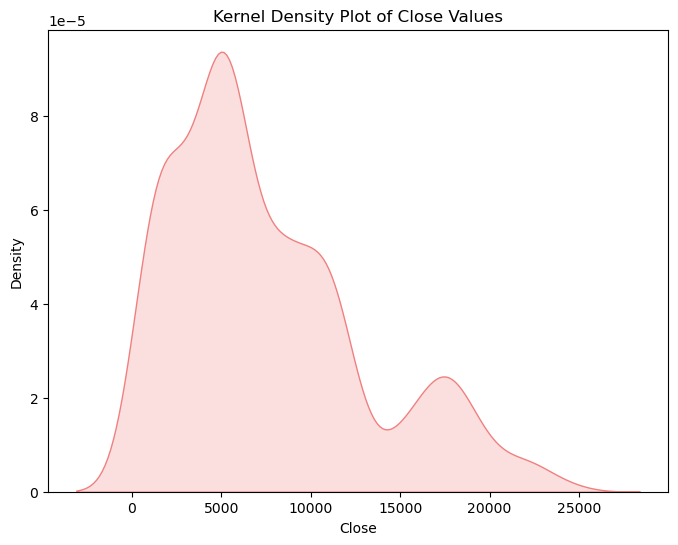

In [296]:
plt.figure(figsize=(8, 6))
sns.kdeplot(Y_test['Close'], shade=True, color='lightcoral')
plt.title('Kernel Density Plot of Close Values')
plt.xlabel('Close')
plt.ylabel('Density')
plt.show()

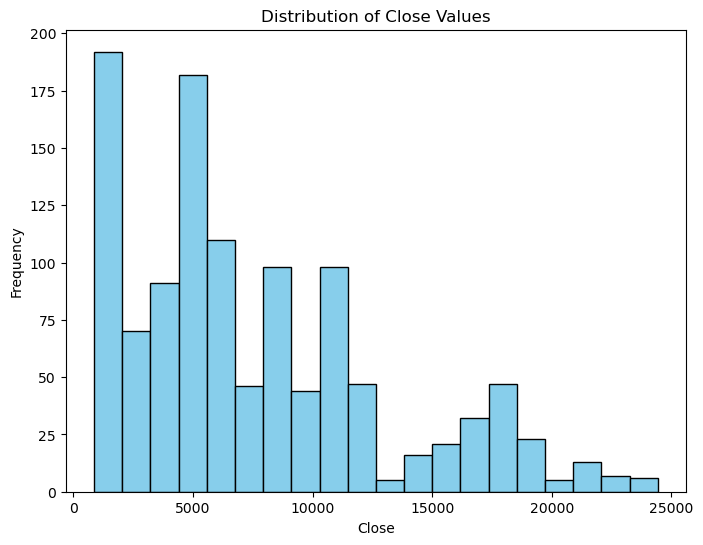

In [298]:
# Histogram
plt.figure(figsize=(8, 6))
plt.hist(Y_test['Close'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Close Values')
plt.xlabel('Close')
plt.ylabel('Frequency')
plt.show()

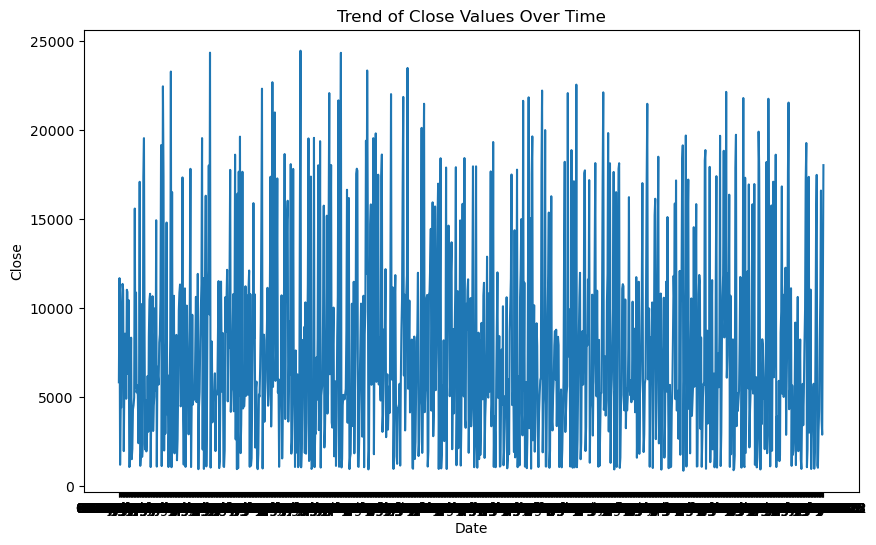

In [300]:
plt.figure(figsize=(10, 6))
plt.plot(Y_test.index, Y_test['Close'])
plt.title('Trend of Close Values Over Time')
plt.xlabel('Date')
plt.ylabel('Close')
plt.show()